In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns

In [2]:
df_train = pd.read_csv("datasets/fraudTrain.csv")
df_test = pd.read_csv("datasets/fraudTest.csv")
print("train size: ", df_train.size, ", test size: ", df_test.size)
df = pd.concat([df_train, df_test], ignore_index=True)
print("Final size: ", df.size)
df.head(5)

train size:  29823525 , test size:  12781537
Final size:  42605062


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
new_feature_names = ['index', 'transaction_time', 'account_number', 'merchant_name', 'category',
                     'transaction_amount', 'first_name', 'last_name', 'gender', 'street', 'city', 'state', 'zip',
                     'client_latitude', 'client_longitude', 'city_population', 'job', 'birthday', 'transaction_number', 
                     'unix_time', 'merchant_latitude', 'merchant_longitude', 'is_fraud']

df.columns = new_feature_names

In [5]:
df.head(3)

,index,transaction_time,account_number,merchant_name,category,transaction_amount,first_name,last_name,gender,street,...,client_latitude,client_longitude,city_population,job,birthday,transaction_number,unix_time,merchant_latitude,merchant_longitude,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [6]:
# Выясним, есть ли пропущенные значения
df.isnull().any().any()

False

In [7]:
df.describe()

,index,account_number,transaction_amount,zip,client_latitude,client_longitude,city_population,unix_time,merchant_latitude,merchant_longitude,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
# Разделим возраст на несколько категорий:
def GetAgeCatedory(age):
    if age < 20:
        return 0;
    if age < 30:
        return 1;
    if age < 40:
        return 2;
    if age < 50:
        return 3;
    if age < 65:
        return 4;
    return 5;

In [9]:
df["transaction_time"] = pd.to_datetime(df["transaction_time"])
df["birthday"] = pd.to_datetime(df["birthday"])
df["age"] = (df["transaction_time"] - df["birthday"]).astype('timedelta64[Y]')
df["age"] = df["age"].apply(GetAgeCatedory)

df["transaction_time"] = df["transaction_time"].apply(lambda x: x.timestamp())
df["birthday"] = df["birthday"].apply(lambda x: x.timestamp())

df["gender"] = df["gender"].apply(lambda x: int(x == 'M'))
df.drop(columns=["index"], inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier

In [11]:
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = LabelEncoder().fit_transform(df[column])
    if df[column].dtype == "bool":
        df[column] = df[column].apply(lambda x: int(x))

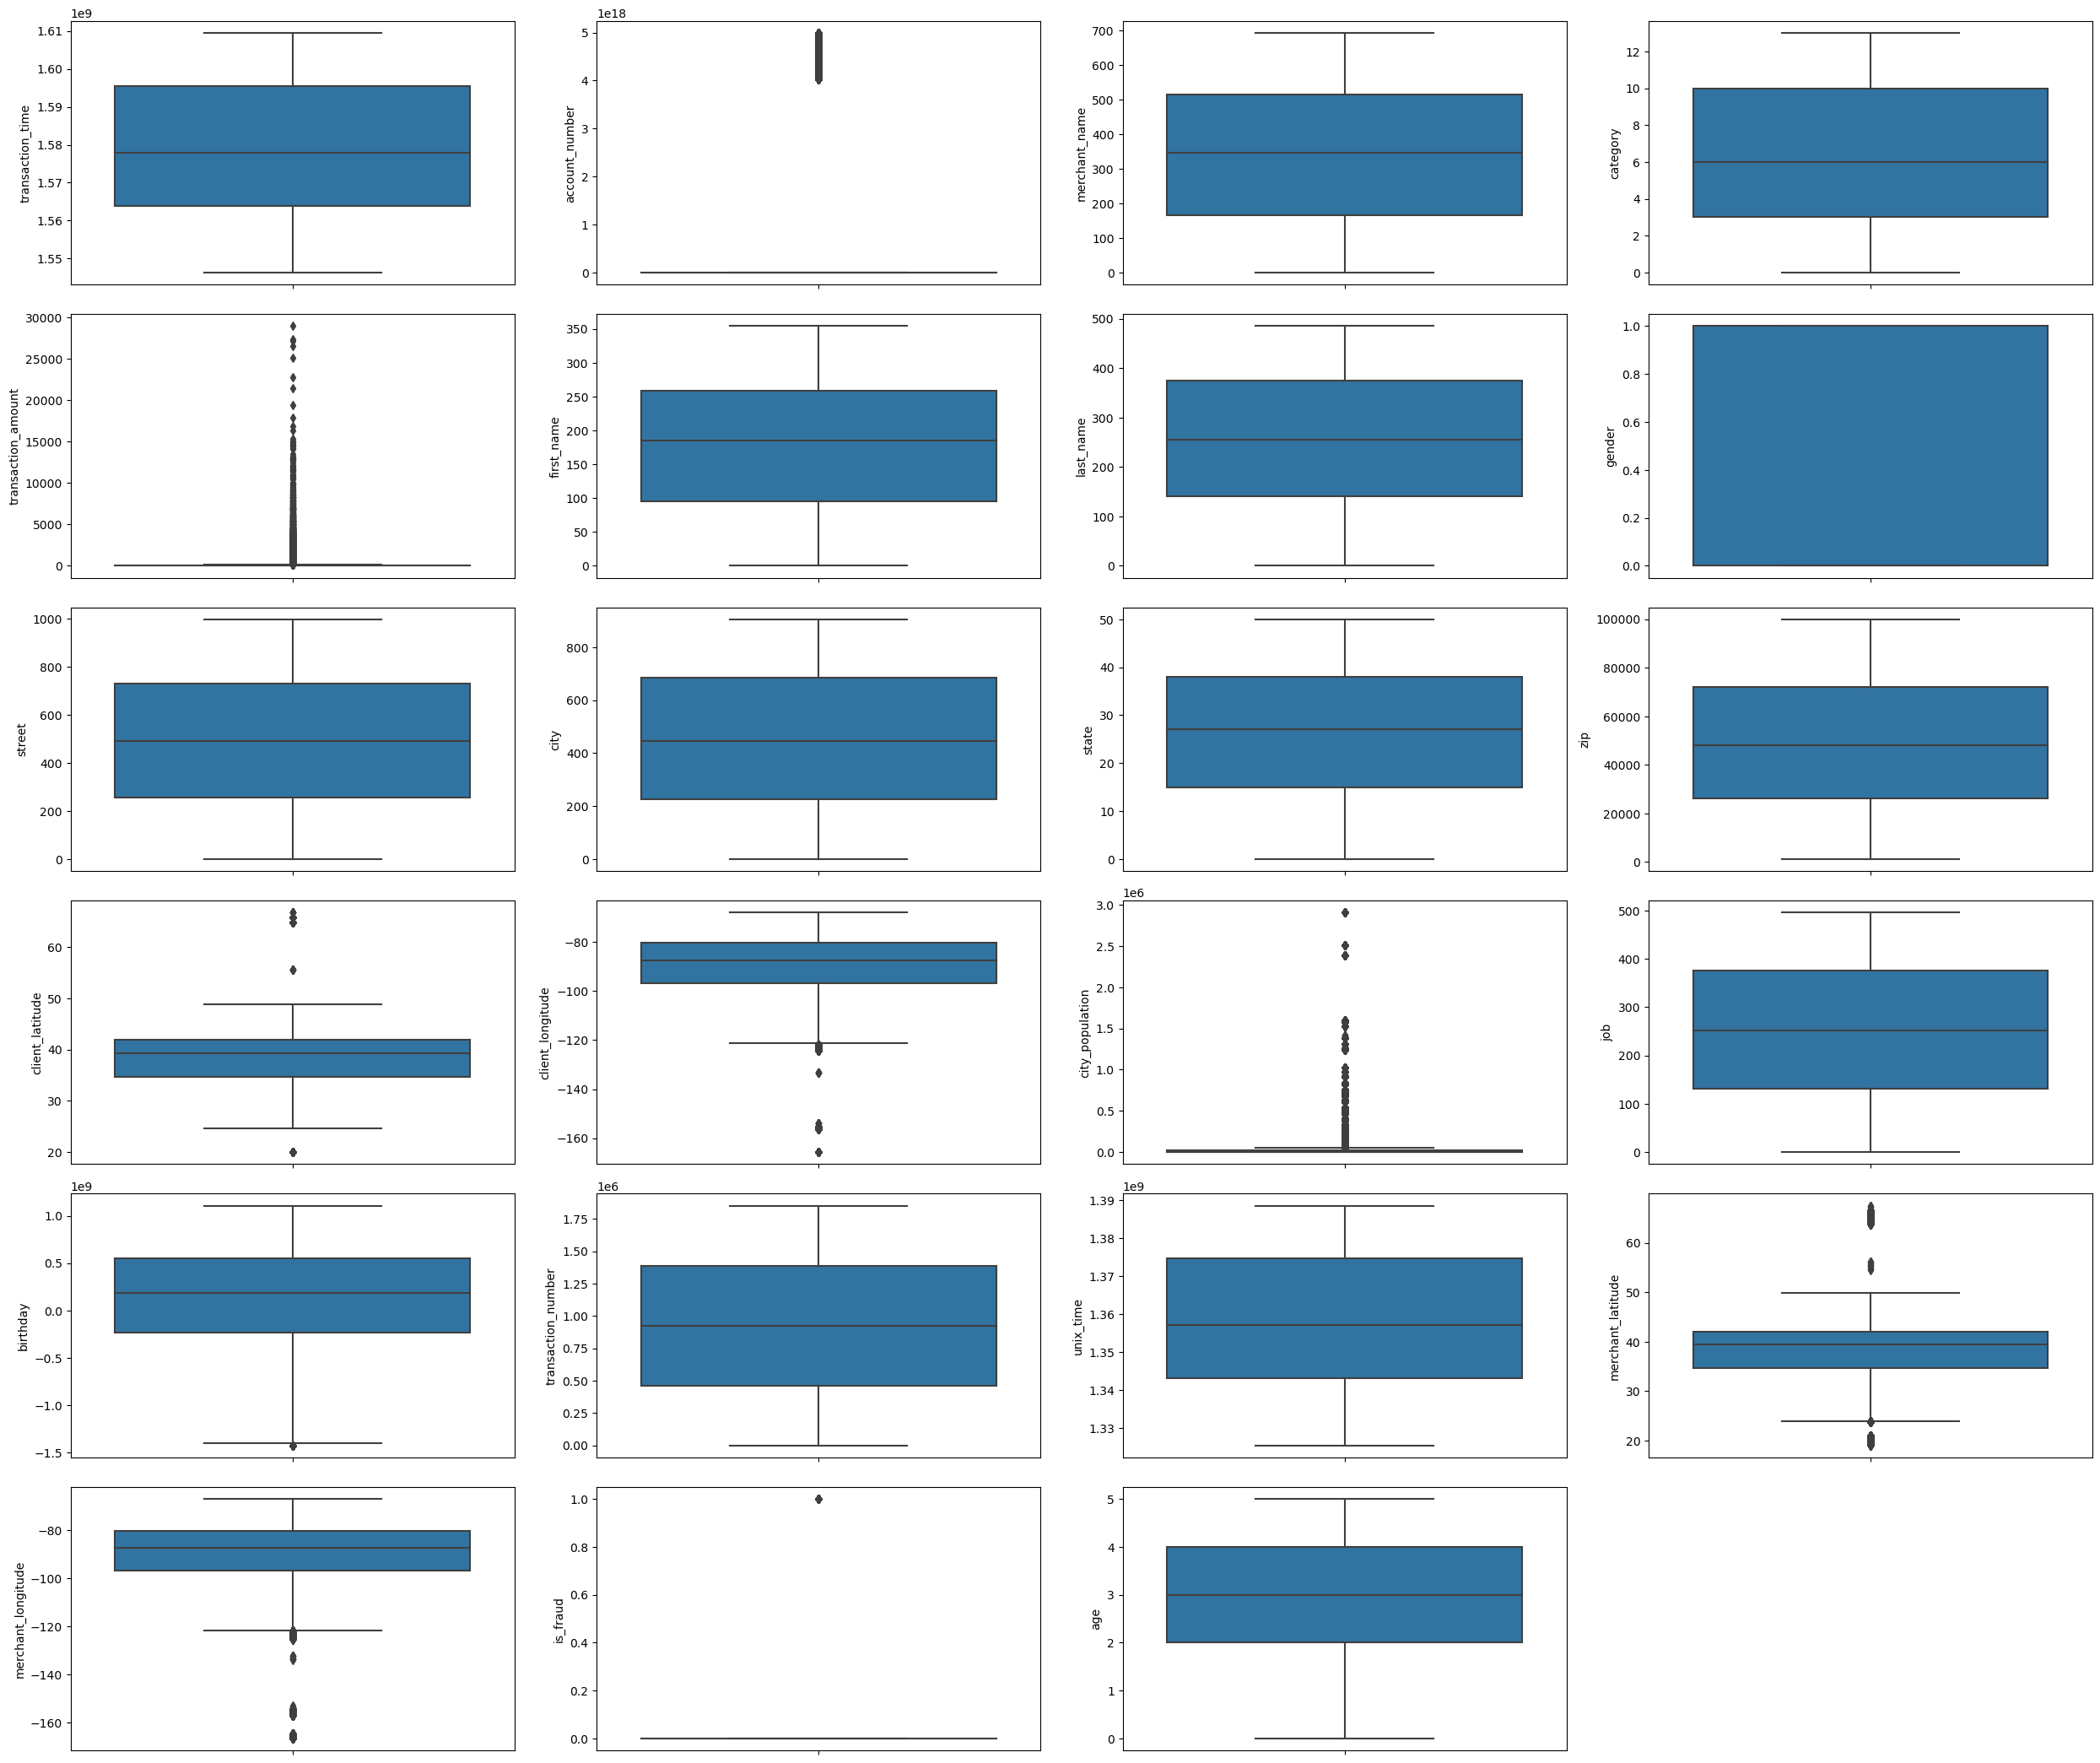

In [12]:
# Отрисовываем диаграмму размаха для всех признаков
plt.figure(figsize=(25, 80))

for i,col in enumerate(df.columns.to_list()):
    plt.subplot(int(np.ceil(df.columns.size)), 4, i + 1)
    sns.boxplot(y=col, data=df)

plt.tight_layout()

plt.show()

In [13]:
# Разделим данные на зависимую и независимые переменные
features = df.drop(columns=["is_fraud"]).to_numpy()
labels = df["is_fraud"].to_numpy()

In [ ]:
isoForest = IsolationForest(contamination=0.07,random_state=0)

In [ ]:
isoForest.fit(features)

In [ ]:
# выявим выбросы в данных
is_anomaly = pd.DataFrame(isoForest.predict(features))
is_anomaly.value_counts()

In [ ]:
# Запишем индексы выбросов в ввиде массива булевых значений
anomaly_indices = list()

for i in range(is_anomaly.size):
    # Оставим данные минорного класса, так как, скорее всего, такие данные были ошибочно
    # помечены как выбросы
    anomaly_indices.append(is_anomaly[0][i] == -1 and df["is_fraud"][i] == 0)
    
anomaly_indices = df[np.array(anomaly_indices)].index
anomaly_indices[-5:] #пять последних элементов

In [ ]:
anomaly_indices.size

In [ ]:
np.sum(df.iloc[anomaly_indices]["is_fraud"] == 1)
np.sum(df.iloc[anomaly_indices]["is_fraud"] == 0)

In [ ]:
anomaly_indices.size / df.shape[0]

In [ ]:
df.drop(index=anomaly_indices, inplace=True)
df.reset_index()
df.head(3)

In [14]:
# Разделим данные на зависимую и независимые переменные
features = df.drop(columns=["is_fraud"]).to_numpy()
labels = df["is_fraud"].to_numpy()

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
extTreesClf = ExtraTreesClassifier(n_estimators=100)

In [17]:
extTreesClf.fit(features, labels)
print(extTreesClf.feature_importances_)

[0.08477863 0.01509998 0.05122007 0.06546352 0.35127183 0.01521078
 0.01532326 0.00567415 0.01586812 0.01490218 0.01296279 0.01406385
 0.01447296 0.01395802 0.01898158 0.01525927 0.01703793 0.0512529
 0.08420638 0.05559048 0.05674648 0.01065484]


In [18]:
ext = pd.DataFrame(extTreesClf.feature_importances_,columns=["extratrees"])
# Сортируем по значимости признаков
ext = ext.sort_values(['extratrees'], ascending=False)
ext[:5]

,extratrees
4,0.351272
0,0.084779
18,0.084206
3,0.065464
20,0.056746


In [19]:
# Достанем имена признаков из номеров
most_important_features_names = df.columns[ext[:10].index].to_list()
print("Имена 10 самых значимых признаков", most_important_features_names)
# Выберем 10 самых значимых признаков
selected_features = features[:, ext[:10].index]
selected_features[:3]

Имена 10 самых значимых признаков ['transaction_amount', 'transaction_time', 'unix_time', 'category', 'merchant_longitude', 'merchant_latitude', 'transaction_number', 'merchant_name', 'city_population', 'birthday']


array([[ 4.97000000e+00,  1.54630082e+09,  1.32537602e+09,
         8.00000000e+00, -8.20483150e+01,  3.60112930e+01,
         8.03260000e+04,  5.14000000e+02,  3.49500000e+03,
         5.73868800e+08],
       [ 1.07230000e+02,  1.54630084e+09,  1.32537604e+09,
         4.00000000e+00, -1.18186462e+02,  4.91590470e+01,
         2.27462000e+05,  2.41000000e+02,  1.49000000e+02,
         2.67235200e+08],
       [ 2.20110000e+02,  1.54630085e+09,  1.32537605e+09,
         0.00000000e+00, -1.12154481e+02,  4.31507040e+01,
         1.16903000e+06,  3.90000000e+02,  4.15400000e+03,
        -2.50905600e+08]])

In [20]:
# Преобразуем данные
r_scaler = RobustScaler()
selected_features = r_scaler.fit_transform(selected_features)
selected_features[:3]

array([[-0.57827389, -0.99923704, -1.00470943,  0.28571429,  0.32378233,
        -0.4652913 , -0.91327326,  0.48275862,  0.05370909,  0.49706176],
       [ 0.8137762 , -0.99923622, -1.0047086 , -0.28571429, -1.84611238,
         1.35670116, -0.75441281, -0.30172414, -0.1171185 ,  0.10355915],
       [ 2.35039477, -0.999236  , -1.00470838, -0.85714286, -1.48392547,
         0.52407563,  0.26218356,  0.12643678,  0.08735386, -0.56137044]])

In [23]:
# Преобразуем данные
std_scaler = StandardScaler()
selected_features = std_scaler.fit_transform(selected_features)
selected_features[:3]

array([[-0.40874072, -1.8247539 , -1.83006655,  0.45216158,  0.59446292,
        -0.49508025, -1.58183484,  0.85089077, -0.28242851,  0.82729043],
       [ 0.23337843, -1.82475247, -1.83006512, -0.57000089, -2.03191538,
         2.08008184, -1.3066806 , -0.50696822, -0.29352681,  0.26895013],
       [ 0.94218354, -1.82475209, -1.83006474, -1.59216336, -1.59353474,
         0.90326813,  0.45411501,  0.2341343 , -0.28024268, -0.67451754]])

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [25]:
selected_features.shape, labels.shape

((1852394, 10), (1852394,))

In [26]:
df_features = df.drop(columns=["is_fraud"]).copy()
features, labels = df_features.copy(), df["is_fraud"].copy()

In [27]:
features_train, features_test, labels_train, labels_test = train_test_split(selected_features, labels, test_size=0.15, random_state=10)

In [28]:
sss = StratifiedShuffleSplit(n_splits=8, test_size=0.3, random_state=0)
sss.get_n_splits(selected_features, labels)

8

In [29]:
df_features = df.drop(columns=["is_fraud"]).copy()

In [30]:
train_indices, test_indices = list(), list()

for i, (train_index, test_index) in enumerate(sss.split(df_features, labels)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}, shape={train_index.shape}")
    print(f"  Test:  index={test_index}, shape={test_index.shape}")
    train_indices, test_indices = train_index, test_index

Fold 0:
  Train: index=[ 148639  371300 1057490 ...  708670  881495 1119928], shape=(1296675,)
  Test:  index=[1773139  369627  613660 ...  791937 1359339 1599354], shape=(555719,)
Fold 1:
  Train: index=[   2934  170264 1134780 ... 1579183 1590752  478401], shape=(1296675,)
  Test:  index=[1247756 1304199 1100497 ...  602200  821113  297366], shape=(555719,)
Fold 2:
  Train: index=[1525568 1482096   45159 ... 1519801  777442  504069], shape=(1296675,)
  Test:  index=[1597995  650819 1509173 ...  559054   95064 1269177], shape=(555719,)
Fold 3:
  Train: index=[1075132 1709700  168629 ...  397232  281735  538866], shape=(1296675,)
  Test:  index=[ 121803   48391 1736269 ...  487085   48606 1624847], shape=(555719,)
Fold 4:
  Train: index=[1021911 1818173 1576679 ...  558075 1370953  115053], shape=(1296675,)
  Test:  index=[ 408687  898627  888090 ... 1455411  391231  176234], shape=(555719,)
Fold 5:
  Train: index=[ 242156  914928 1519366 ... 1541484  890100  172247], shape=(1296675,)


In [31]:
selected_features.shape

(1852394, 10)

In [32]:
X_train, X_test = selected_features[train_indices], selected_features[test_indices]
Y_train, Y_test = labels.iloc[train_indices], labels.iloc[test_indices]

In [33]:
np.sum(Y_train == 1)

6756

In [34]:
np.sum(Y_test == 1)

2895

In [35]:
underX_Train, underY_Train = NearMiss(sampling_strategy=0.1).fit_resample(X_train, Y_train)

In [36]:
underX_Train.shape

(74316, 10)

In [37]:
print(np.sum(underY_Train == 0))
print(np.sum(underY_Train == 1))

67560
6756


In [38]:
preparedX_train, preparedY_train = SMOTE(sampling_strategy="minority").fit_resample(underX_Train, underY_Train)

In [39]:
preparedX_train.shape

(135120, 10)

In [40]:
print(np.sum(preparedY_train == 0))
print(np.sum(preparedY_train == 1))

67560
67560


In [41]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #  

In [62]:
pca = PCA(n_components=8)

In [63]:
%%time
pca_features = pca.fit_transform(preparedX_train, preparedY_train)

CPU times: total: 31.2 ms
Wall time: 30.5 ms


In [64]:
pca.explained_variance_

array([5.75641411, 1.7225471 , 0.87974827, 0.83687007, 0.75836726,
       0.73988349, 0.67099926, 0.57027191])

In [65]:
pca.components_.shape

(8, 10)

In [66]:
sum(pca.explained_variance_ratio_)*100

96.14663606725388

In [67]:
pca_features.shape

(135120, 8)

In [68]:
feature_normalization_layer = tf.keras.layers.Normalization()
feature_normalization_layer.adapt(preparedX_train)

In [69]:
model = tf.keras.Sequential([
    feature_normalization_layer,
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                        

In [70]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=tf.keras.optimizers.Adam(learning_rate=10**-2),
    #metrics=[tf.keras.metrics.BinatyAccuracy()]
    metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.BinaryAccuracy()]    
)

In [71]:
%%time
model.fit(preparedX_train, preparedY_train, epochs=40, batch_size=64, validation_data=(X_test, Y_test), validation_split=0.3)

Epoch 1/40
2112/2112 [==============================] - 26s 12ms/step - loss: 0.2697 - recall: 0.8508 - binary_accuracy: 0.8999 - val_loss: 1.1487 - val_recall: 0.8984 - val_binary_accuracy: 0.6187
Epoch 2/40
2112/2112 [==============================] - 24s 11ms/step - loss: 0.2099 - recall: 0.8855 - binary_accuracy: 0.9229 - val_loss: 0.9073 - val_recall: 0.8691 - val_binary_accuracy: 0.7203
Epoch 3/40
2112/2112 [==============================] - 24s 11ms/step - loss: 0.1939 - recall: 0.8976 - binary_accuracy: 0.9275 - val_loss: 0.6802 - val_recall: 0.9285 - val_binary_accuracy: 0.6715
Epoch 4/40
2112/2112 [==============================] - 24s 11ms/step - loss: 0.1907 - recall: 0.9006 - binary_accuracy: 0.9290 - val_loss: 1.1261 - val_recall: 0.9333 - val_binary_accuracy: 0.6328
Epoch 5/40
2112/2112 [==============================] - 24s 11ms/step - loss: 0.1814 - recall: 0.9057 - binary_accuracy: 0.9310 - val_loss: 1.1869 - val_recall: 0.8653 - val_binary_accuracy: 0.6503
Epoch 6/40

KeyboardInterrupt: 

In [73]:
y_predict = model.predict(X_test)

17367/17367 [==============================] - 20s 1ms/step


In [74]:
model.evaluate(X_test, Y_test)

17367/17367 [==============================] - 39s 2ms/step - loss: 0.7176 - recall: 0.9993 - binary_accuracy: 0.0071


[0.717634379863739, 0.9993091821670532, 0.007068320643156767]

In [ ]:
for r in range(1, features.shape[1]):
    pca1 = PCA(n_components=r)
    pca.fit(data_set)
    # Останавливаемся, когда объясняемая дисперсия будет больше 97.5%
    if (sum(pca.explained_variance_ratio_) * 100) > 97.5:    
        print("r = ", r, ",Дисперсия = ", sum(pca.explained_variance_ratio_)*100, "%")
        break

In [ ]:
labels_train.value_counts()

In [ ]:
labels.value_counts()

In [ ]:
np.sum(labels == 1) / np.sum(labels == 0)

In [ ]:
labels[x==1]

In [ ]:
labels_predict = model.predict(features_test)

In [ ]:
np.unique(labels_predict)

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [78]:
y_predict_labels = np.floor(y_predict + 0.5)
y_predict_labels

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [79]:
confusion_matrix(Y_test, y_predict_labels)

array([[  1035, 551789],
       [     2,   2893]], dtype=int64)

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
model2 = RandomForestClassifier(random_state=5)
model2.fit(preparedX_train, preparedY_train)

RandomForestClassifier(random_state=5)

In [82]:
predicted = model2.predict(X_test)
print('Classification report:\n', classification_report(Y_test, predicted))
conf_mat = confusion_matrix(y_true=Y_test, y_pred=predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89    552824
           1       0.02      0.94      0.05      2895

    accuracy                           0.81    555719
   macro avg       0.51      0.87      0.47    555719
weighted avg       0.99      0.81      0.89    555719



In [83]:
conf_mat

array([[445073, 107751],
       [   178,   2717]], dtype=int64)